# Leaky Integrate-and-Fire Model with Modifications

## Goal:
**Associative memorization of signals:**
 - Taste of an orange leads to thought of word "orange"
 - Sound of seagulls can lead to visualization of seagulls
 - An empty fridge can remind a person to get groceries
   - The order of groceries follows associatively
 - Second-to-second song memorization

**One possible method:** State space tunnels/attractors for memorized signals. It would have some desired properties:
 - For N neurons, each cell's voltage is one axis in an N-dimensional phase space (assuming we ignore other state variables)
 - Should be auto-associative (self-completing from any portion, forward in time)
 - Should allow one group of cells to have the correct phase space dynamics for reconstructing signals
 - Auto-associativity also allows for hetero-associativity (example: linking sounds to muscle movements)
 
I tried Hodgkin-Huxley and FitzHugh-Nagumo models, but since I used ODEInt for those, they simulated **enormously slowly**. I may reattempt them with a lower order integrator if leaky integrate-and-fire models don't work.

<img src="illustration.png">

**Helpful properties?**
 - Quick replay (spiking): upon replay, phase space trajectory moves quickly so that the trajectories traced when previously exposed to stimuli are replayed more quickly than the speed at which they was observed. 
 - Bursting: more pressure to quickly adapt state variables or (if combined with noise) create many alternate routes through phase space for the same signal?
 - More proposed at the end.
 
**Leaky integrate-and-fire (LIF):**

Since I might want spiking, then I'll start with LIF models.
$$C\frac{dV(t)}{dt}=-\frac{1}{R}V(t) + W*g_{syn}(t)*(E_{syn}-V(t-t_{delay})) + I_{ext}(t)$$
$$g_{syn}(t)=e^{\frac{-(t-t_f)}{\tau_{syn}}}$$
where $C$ is membrane capacitance, $R$ is resistance to current flow across membrane, $E_{syn}$ is the voltage that $V(t)$ tends toward after synaptic (excitatory/inhibitory) stimulation, $g_{syn}$ is maximal conductance for the synapse, and $W$ is a series of weights which implement strength (or absence) of synaptic connections. 

Integration method: Euler (seems to do well with $dt=0.01$ ms)

In [2]:
import numpy as np
from demo_function_LIF_network import run_LIF_network
from demo_model_LIF_network_April_15 import LIF_network
import demo_externally_provided_currents_April_15 as currents
from demo_neuronal_plotting_April_15 import plot_many_neurons_simultaneous
from demo_neuronal_plotting_April_15 import make_raster_plot

In [3]:
N = 1000
use_STDP = False

driving_current = currents.sum_multi_current_object([currents.I_flat_random_targets(N, magnitude=20)])

params = {  
    'current_object': driving_current,
    'N': N,
    'dt': 0.01,
    'time_total': 100.0, # ms
    # Synapse density (1 = fully connected, 0 = never any connection)
    'synapse_density': 0.1,
    # Synaptic conductance scaling factor
    'g_syn_max': 0.2,
    # Delay between presynaptic neuron firing and effect on postsynaptic neuron starting
    'synapse_delay_delta_t': 0.0, #ms
    # Synaptic time constant
    'tau_syn': 3, # ms
    # Synaptic Nernst potentials
    # Each presynaptic neuron in this simulation is either inhibitory or excitatory (also known as Dale's Law)
    # Not totally necessary but I'll implement it here anyway
    'E_syn_excitatory': 15, # arbitrarily decided values
    'E_syn_inhibitory': 0,
    'ei_threshold': 0.8,# "excite-inhibit threshold". A number between 0 and 1. Percentage of connections which are inhibitory
    # STDP-related variables
    'use_STDP': use_STDP,  # Control whether STDP is used to adapt synaptic weights or not
    'tau_W': 3,  # ms
    'STDP_scaling': 0.0
}

## Without any time delay, noise, or synaptic adaptation:

Running 1000 neurons for 10000 timesteps of size 0.01
Program took 1.260969638824463 seconds to run.


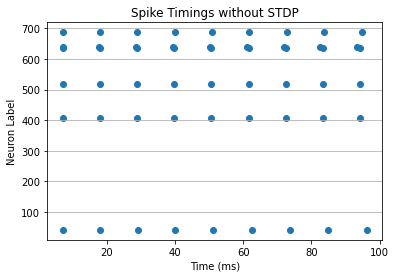

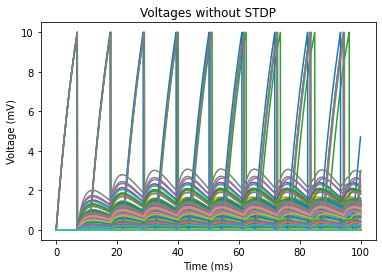

In [3]:
results = run_LIF_network(**params)
sol_V_t, W_final, times_array, timesteps, spike_list, extra_descriptors = results


# Plot the active neurons
make_raster_plot(N, spike_list, use_STDP, extra_descriptors)
plot_many_neurons_simultaneous(N, times_array, sol_V_t.reshape(timesteps, 1, N), use_STDP, extra_descriptors)

## Adding time-delayed synaptic transmission:

Running 1000 neurons for 10000 timesteps of size 0.01
Program took 1.1689717769622803 seconds to run.


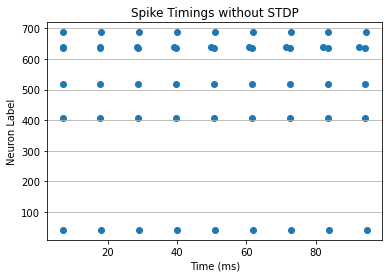

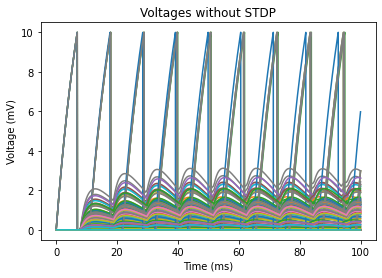

In [4]:
params['synapse_delay_delta_t'] = 1.0
results = run_LIF_network(**params)
sol_V_t, W_final, times_array, timesteps, spike_list, extra_descriptors = results

# Plot the active neurons
make_raster_plot(N, spike_list, use_STDP, extra_descriptors)
plot_many_neurons_simultaneous(N, times_array, sol_V_t.reshape(timesteps, 1, N), use_STDP, extra_descriptors)

## Adding synaptic adaptation:

Running 1000 neurons for 10000 timesteps of size 0.01
Program took 208.20796966552734 seconds to run.


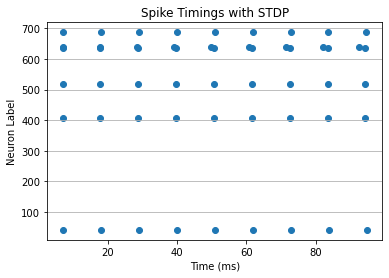

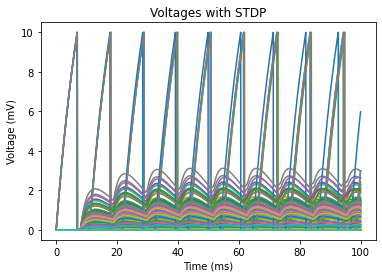

In [5]:
use_STDP = True
params['use_STDP'] = use_STDP
results = run_LIF_network(**params)
sol_V_t, W_final, times_array, timesteps, spike_list, extra_descriptors = results

# Plot the active neurons
make_raster_plot(N, spike_list, use_STDP, extra_descriptors)
plot_many_neurons_simultaneous(N, times_array, sol_V_t.reshape(timesteps, 1, N), use_STDP, extra_descriptors)

## Adding noise to injected current:

Running 1000 neurons for 10000 timesteps of size 0.01
Program took 1.3099656105041504 seconds to run.


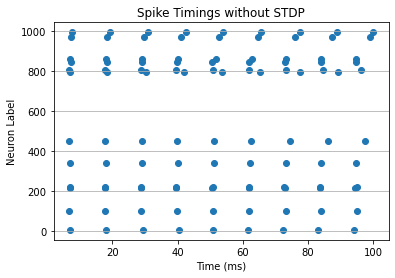

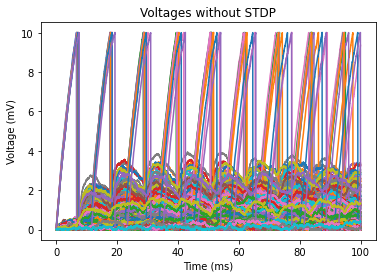

Running 1000 neurons for 10000 timesteps of size 0.01
Program took 212.39796900749207 seconds to run.


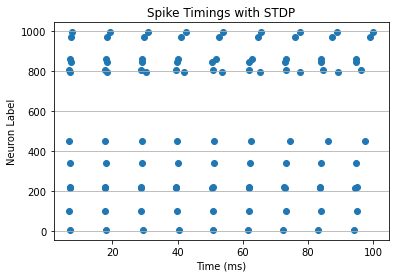

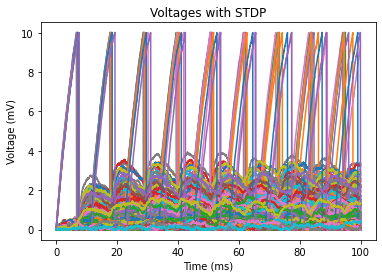

In [9]:
driving_current = currents.sum_multi_current_object([currents.I_flat_random_targets(N, magnitude=20),
                                                     currents.I_flat_random_noise()])
use_STDP = False
params['current_object'] = driving_current
params['use_STDP'] = use_STDP
results = run_LIF_network(**params)
sol_V_t, W_final, times_array, timesteps, spike_list, extra_descriptors = results

# Plot the active neurons
make_raster_plot(N, spike_list, use_STDP, extra_descriptors)
plot_many_neurons_simultaneous(N, times_array, sol_V_t.reshape(timesteps, 1, N), use_STDP, extra_descriptors)

#===========================

use_STDP = True
params['use_STDP'] = use_STDP
results = run_LIF_network(**params)
sol_V_t, W_final, times_array, timesteps, spike_list, extra_descriptors = results

# Plot the active neurons
make_raster_plot(N, spike_list, use_STDP, extra_descriptors)
plot_many_neurons_simultaneous(N, times_array, sol_V_t.reshape(timesteps, 1, N), use_STDP, extra_descriptors)

## TODO:

- Create tests and measures of robustness using networks that observe (and hopefully adapt to memorize) signals
 - Try to memorize this [birdsong dataset](https://www.kaggle.com/pavansanagapati/birds-sounds-eda-spotify-urban-sound-eda) or chiptunes.
 - Introduce noisy versions of data and see whether neuron response "snaps" to memorized sequence
 - If so, test whether sped-up and slowed-down versions also create the same dynamics
- Broadly need to consider whether additional internal neuron dynamics can help change phase space so that tunnels can be formed
 - Maybe would like initially "free-roaming" phase space trajectories
 - Maybe implement individual (and adjustable?) time delays
 - Adaptive threshold?
 - Will more noise help?
 - Bursting and persistence of spiking after stimulus disappears? May need a second state variable that saturates quickly with current stimulus but decays slowly and contributes positively to $\frac{dV(t)}{dt}$.
 - Should time spent over threshold should be nonzero?
 - "Chunking" and hierarchies of neuron groups? For example, a song may be chunked into frequencies and into half-second segments. While some groups of "tier 1" neurons may memorize those small chunks, other groups of "tier 2" neurons may memorize chunks of activity from those "tier 1" neurons.
